In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
for i in (x_train, y_train, x_test, y_test):
    print(i.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
from tensorflow.keras.preprocessing import image

In [6]:
x_train[0].shape

(28, 28)

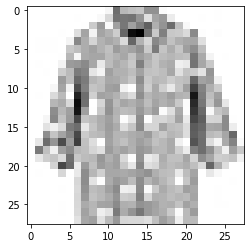

In [7]:
plt.imshow(x_train[560],cmap='Greys')

In [8]:
y_train[560]

6

<AxesSubplot:ylabel='count'>

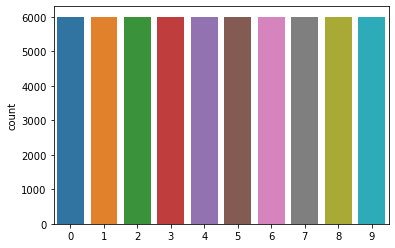

In [9]:
sns.countplot(x=y_train)

In [10]:
x_train[0].max()

255

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [15]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train)

In [18]:
y_cat_test = to_categorical(y_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [39]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='valid',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))

model.add(Dense(units=64,activation='relu'))

model.add(Dense(units=32,activation='relu'))

model.add(Dropout(rate=0.2))

model.add(Dense(units=10,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
 early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [43]:
model.fit(x_train,y_cat_train,epochs=10,callbacks=[early_stop],validation_data=(x_test,y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.6247 - accuracy: 0.7774 - val_loss: 0.4492 - val_accuracy: 0.8411
Epoch 2/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.3917 - accuracy: 0.8615 - val_loss: 0.3536 - val_accuracy: 0.8714
Epoch 3/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.3293 - accuracy: 0.8835 - val_loss: 0.3336 - val_accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2938 - accuracy: 0.8940 - val_loss: 0.3154 - val_accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.2642 - accuracy: 0.9045 - val_loss: 0.2980 - val_accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.2418 - accuracy: 0.9119 - val_loss: 0.2890 - val_accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2239 - accuracy: 0.9190 - val_loss: 0.31

In [44]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

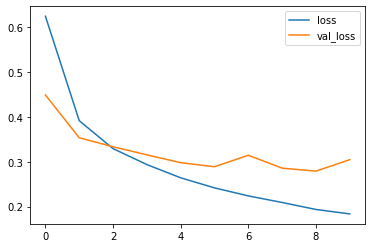

In [45]:
metrics[["loss","val_loss"]].plot()

<AxesSubplot:>

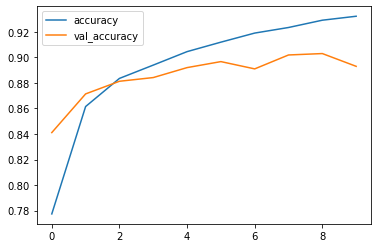

In [46]:
metrics[["accuracy","val_accuracy"]].plot()

In [49]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.3047 - accuracy: 0.8930


[0.3047250807285309, 0.8930000066757202]

In [55]:
predictions = np.argmax(model.predict(x_test),axis=1)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.88      0.84      1000
           3       0.92      0.87      0.89      1000
           4       0.84      0.80      0.82      1000
           5       0.97      0.98      0.97      1000
           6       0.70      0.69      0.70      1000
           7       0.97      0.92      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<AxesSubplot:>

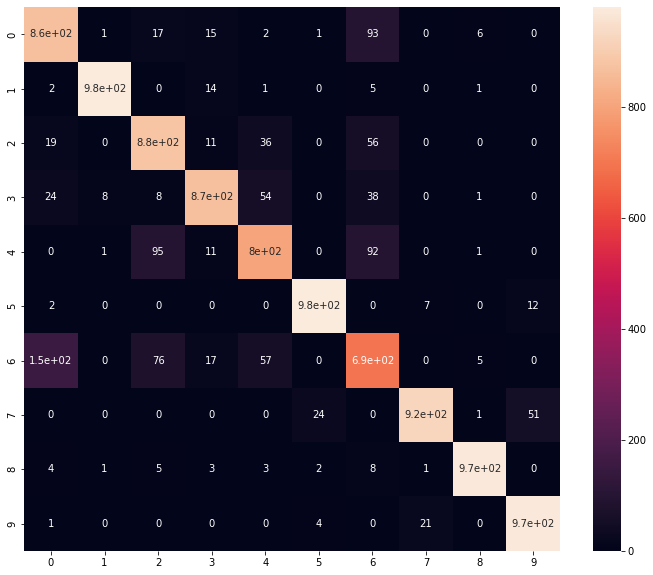

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [59]:
len(y_test)

10000

In [64]:
my_item = x_test[456]

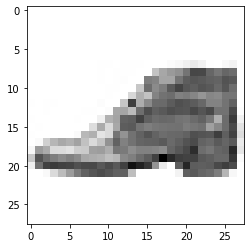

In [65]:
plt.imshow(my_item,cmap='Greys')

In [66]:
np.argmax(model.predict(my_item.reshape(1,28,28,1)),axis=1)

array([9])

In [67]:
y_test[456]

9